In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
glass_dataset = pd.read_csv("glass.csv")

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [41]:
glass_dataset.sample(n=10)

,Id Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type Of Glass
104,105,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
122,123,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.00,0.00,2
188,189,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
19,20,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
32,33,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
157,158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,3


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [42]:
glass_dataset.isnull().sum()

Id Number           0
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type Of Glass       0
dtype: int64

In [43]:
#no missing values found here
glass_dataset.shape

(214, 11)

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [44]:
glass_dataset.head(10)

,Id Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


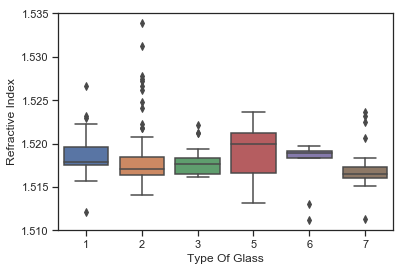

In [45]:
sns.boxplot("Type Of Glass","Refractive Index",data=glass_dataset)

In [46]:
glass_dataset.head(10)

,Id Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


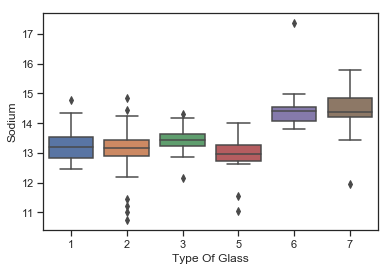

In [47]:
sns.boxplot("Type Of Glass","Sodium",data=glass_dataset)

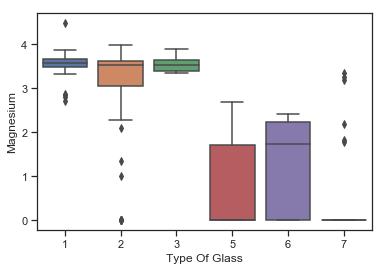

In [48]:
sns.boxplot("Type Of Glass","Magnesium",data=glass_dataset)

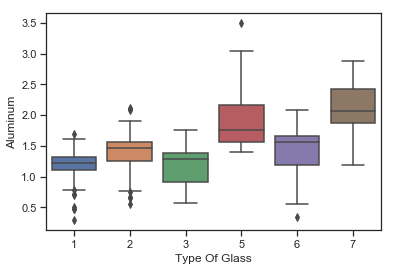

In [49]:
sns.boxplot("Type Of Glass","Aluminum",data=glass_dataset)

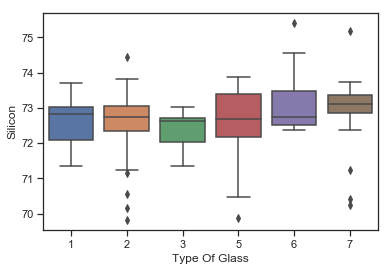

In [50]:
sns.boxplot("Type Of Glass","Silicon",data=glass_dataset)

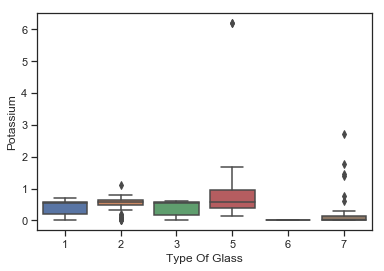

In [51]:
sns.boxplot("Type Of Glass","Potassium",data=glass_dataset)

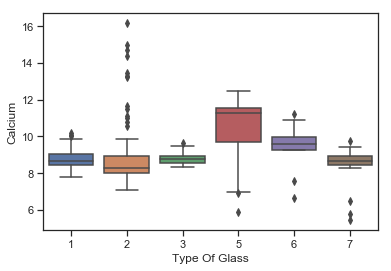

In [52]:
sns.boxplot("Type Of Glass","Calcium",data=glass_dataset)

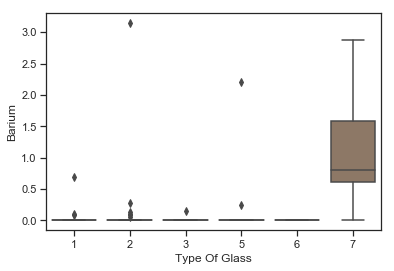

In [53]:
sns.boxplot("Type Of Glass","Barium",data=glass_dataset)

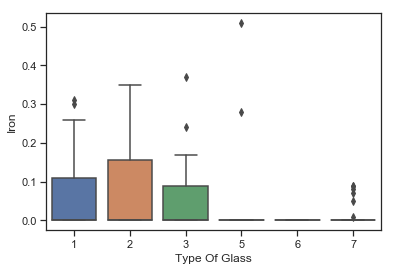

In [54]:
sns.boxplot("Type Of Glass","Iron",data=glass_dataset)

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [55]:
glass_dataset.describe()

,Id Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type Of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [56]:
glass_dataset.var()

Id Number           3834.166667
Refractive Index       0.000009
Sodium                 0.666841
Magnesium              2.080540
Aluminum               0.249270
Silicon                0.599921
Potassium              0.425354
Calcium                2.025366
Barium                 0.247227
Iron                   0.009494
Type Of Glass          4.425716
dtype: float64

In [ ]:
#from min and max, variances it shows  
# for sodium, magnesium, Aluminum, Sillion not having much variance and difference in ranges on min, 25%,75%,max but
# from potassium, calcium, barium, Iron has much variances here;

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

C:\Users\kumar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


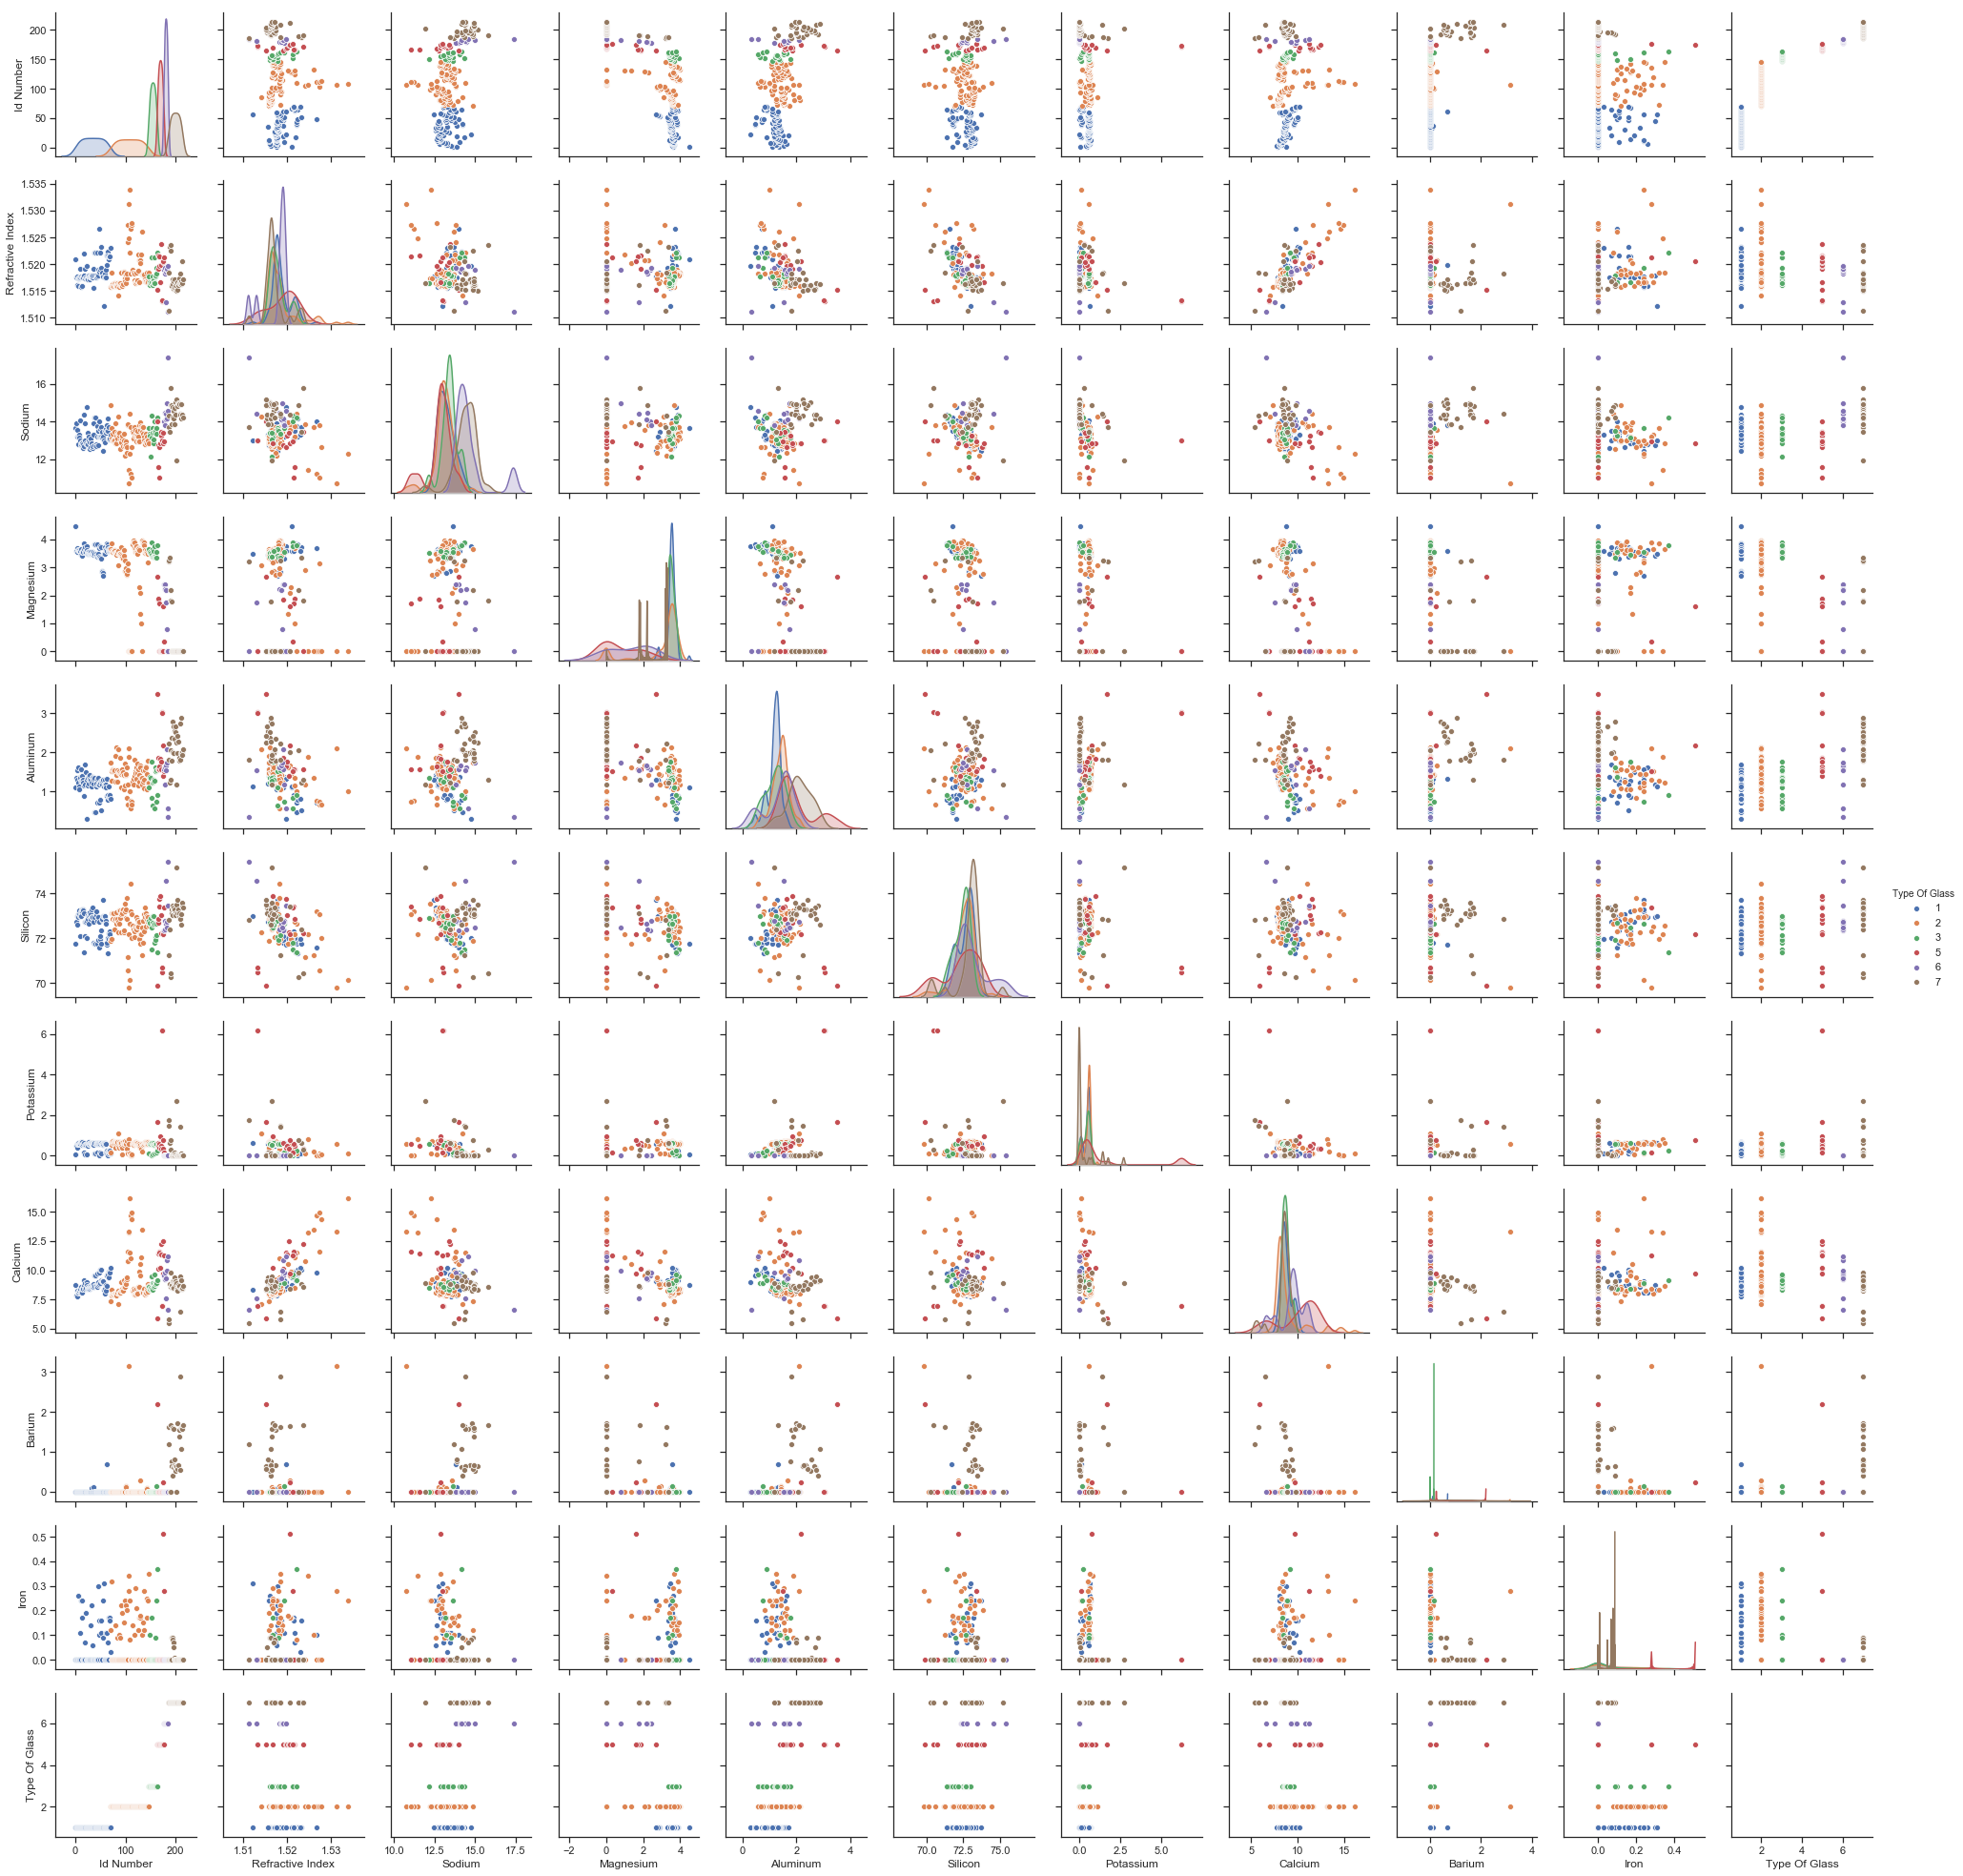

In [57]:
sns.set(style="ticks")

sns.pairplot(glass_dataset, hue="Type Of Glass")



In [58]:
features = glass_dataset.columns[:-1].tolist()
features

['Id Number',
 'Refractive Index',
 'Sodium',
 'Magnesium',
 'Aluminum',
 'Silicon',
 'Potassium',
 'Calcium',
 'Barium',
 'Iron']

In [59]:
# Detect observations with more than one outlier
from collections import Counter

def outlier_detection(df):
    """
    dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers  

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_detection(glass_dataset[features])))) 

The dataset contains 14 observations with more than 2 outliers


In [60]:
glass_dataset.shape

(214, 11)

In [30]:
# this dataset has 14 observations with more than 2 outliers; hence it will affect the training data model;
# importantly we need remove those outliers to build an effective data model by splitting training and testing data sets 

In [62]:
outlier_data = outlier_detection(glass_dataset[features])
glass_dataset = glass_dataset.drop(outlier_data).reset_index(drop=True)
glass_dataset.shape

(200, 11)

In [ ]:
# now removed 14 observations of outlier data

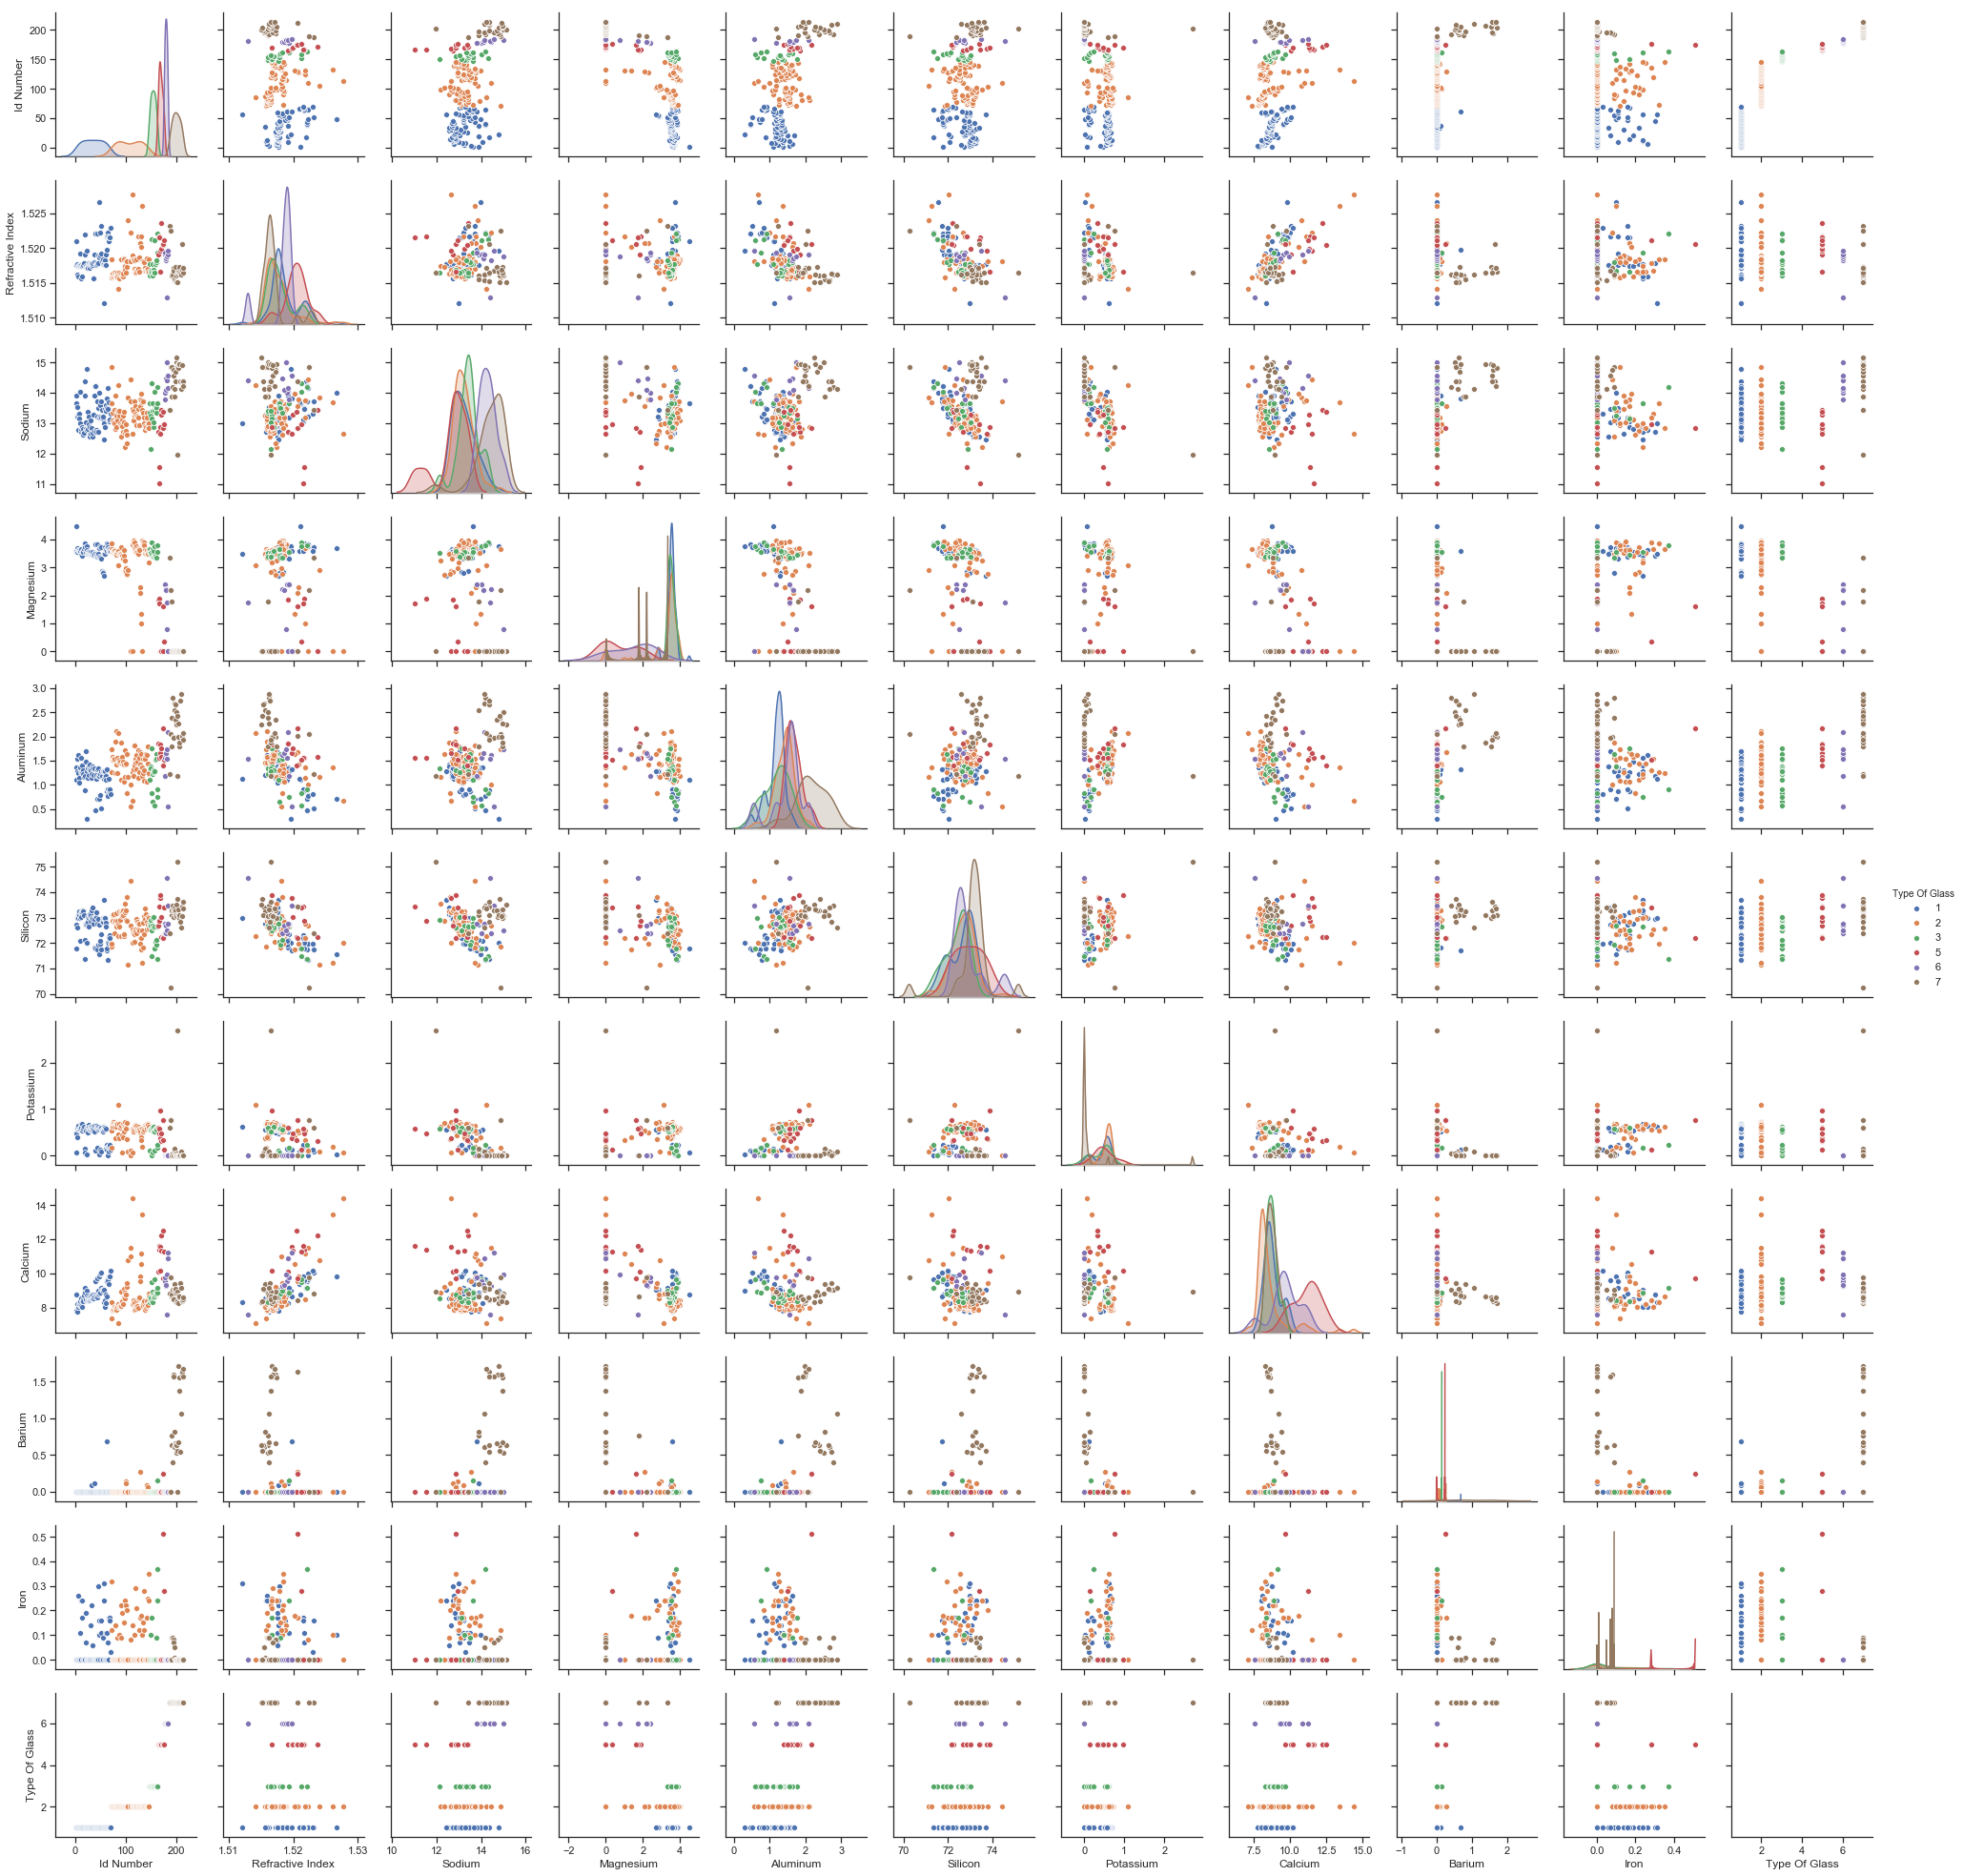

In [63]:
sns.set(style="ticks")

sns.pairplot(glass_dataset, hue="Type Of Glass")


In [64]:
glass_dataset.describe()

,Id Number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type Of Glass
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,104.460000,1.518173,13.41575,2.801850,1.424950,72.722250,0.428700,8.90035,0.123650,0.056700,2.670000
std,62.112869,0.002335,0.69161,1.370908,0.444292,0.620959,0.304392,1.03586,0.362892,0.095718,2.054802
min,1.000000,1.512150,11.03000,0.000000,0.290000,70.260000,0.000000,7.08000,0.000000,0.000000,1.000000
25%,50.750000,1.516545,12.93000,2.635000,1.190000,72.355000,0.130000,8.27750,0.000000,0.000000,1.000000
50%,100.500000,1.517650,13.30000,3.495000,1.360000,72.820000,0.550000,8.60000,0.000000,0.000000,2.000000
75%,156.250000,1.519060,13.79500,3.610000,1.612500,73.100000,0.600000,9.14000,0.000000,0.100000,3.000000
max,214.000000,1.527770,15.15000,4.490000,2.880000,75.180000,2.700000,14.40000,1.710000,0.510000,7.000000


In [65]:
glass_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
Id Number           200 non-null int64
Refractive Index    200 non-null float64
Sodium              200 non-null float64
Magnesium           200 non-null float64
Aluminum            200 non-null float64
Silicon             200 non-null float64
Potassium           200 non-null float64
Calcium             200 non-null float64
Barium              200 non-null float64
Iron                200 non-null float64
Type Of Glass       200 non-null int64
dtypes: float64(9), int64(2)
memory usage: 17.3 KB


In [66]:
glass_dataset['Type Of Glass'].value_counts()

2    70
1    70
7    25
3    17
5    10
6     8
Name: Type Of Glass, dtype: int64

In [67]:
import matplotlib.pyplot as plt

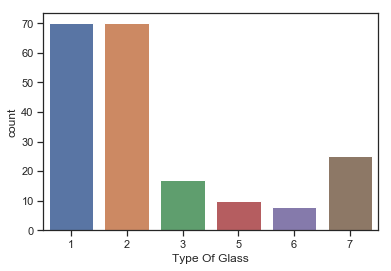

In [69]:
sns.countplot(glass_dataset['Type Of Glass'])
plt.show()

In [72]:
glass_dataset.shape

(200, 11)

In [79]:
glass_dataset[features[1:10]]

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [80]:
glass_dataset["Type Of Glass"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
170    6
171    6
172    6
173    6
174    6
175    7
176    7
177    7
178    7
179    7
180    7
181    7
182    7
183    7
184    7
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
Name: Type Of Glass, Length: 200, dtype: int64

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [82]:
# Define X as features and y as lablels
X = np.array(glass_dataset[features[1:10]]) 
y = np.array(glass_dataset['Type Of Glass']) 

from sklearn.model_selection import train_test_split

# set a seed and a test size for splitting the dataset 
seed = 50
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def build_accuracy_model(n_neighbours_value, X_train, y_train,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours_value)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(accuracy_score(y_test, pred))


In [85]:
# for K = 3
build_accuracy_model(3, X_train, y_train,X_test,y_test)

0.65


In [86]:
# for K = 6
build_accuracy_model(6, X_train, y_train,X_test,y_test)

0.675


In [87]:
# for K = 9
build_accuracy_model(3, X_train, y_train,X_test,y_test)

0.65


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [89]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
list_data = list(range(1,20))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, list_data)


# empty list that will hold cross validate scores
cross_validate_score = []
k_neighbors = []


# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_validate_score.append(scores.mean())
    k_neighbors.append(k)


In [90]:

MSE = [1 - x for x in cross_validate_score]
min(MSE)
MSE.index(min(MSE))
best_k = list_data[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

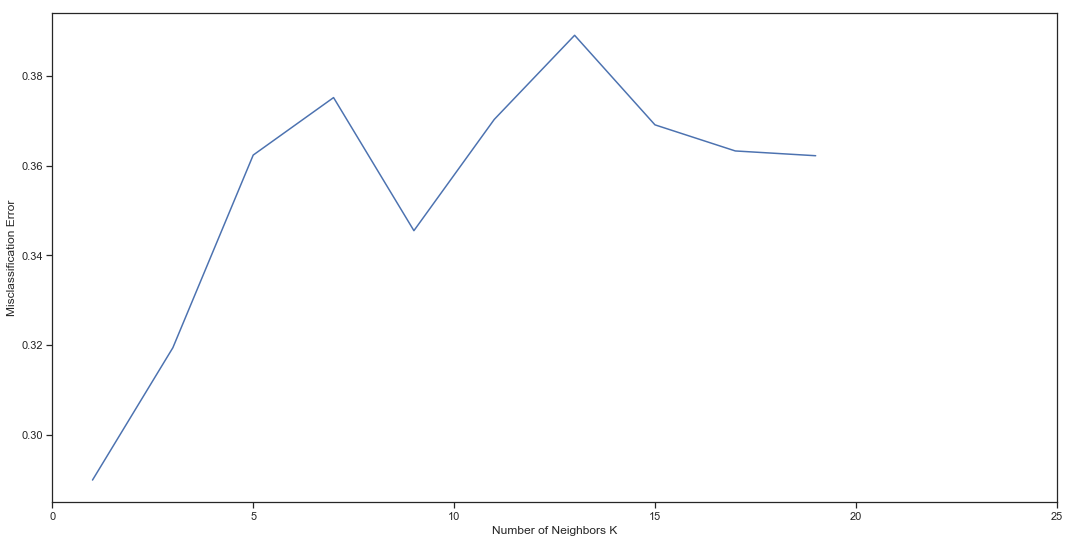

In [91]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
